In [1]:
import pandas as pd
from pandas import DataFrame as df
from pandas import Series
import numpy as np
import datetime
from datetime import datetime, time, date
from datetime import timedelta
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [2]:
data=pd.read_csv("Auction_master_train.csv")
data=pd.DataFrame(data)
print(data.head())
data.isnull().sum()
print(data.Final_auction_date)

   Auction_key Auction_class Bid_class  Claim_price Appraisal_company  \
0         2687            임의        개별   1766037301              정명감정   
1         2577            임의        일반    152946867               희감정   
2         2197            임의        개별     11326510              혜림감정   
3         2642            임의        일반    183581724              신라감정   
4         1958            강제        일반     45887671              나라감정   

        Appraisal_date  Auction_count  Auction_miscarriage_count  \
0  2017-07-26 00:00:00              2                          1   
1  2016-09-12 00:00:00              2                          1   
2  2016-11-22 00:00:00              3                          2   
3  2016-12-13 00:00:00              2                          1   
4  2016-03-07 00:00:00              2                          1   

   Total_land_gross_area  Total_land_real_area     ...       Specific  \
0                12592.0                 37.35     ...            NaN   
1     

In [3]:
data=data.drop(['Auction_key','point.x','point.y','road_bunji1','road_bunji2','Specific','addr_bunji2','addr_li',],axis=1)

In [4]:
# y 라는 변수 설정. Hammer_price가 median 이상이면 1, 아니면 2
data['y']=np.where(data['Hammer_price']>= data['Hammer_price'].median(), 1,2)

In [5]:
data["Appraisal_date"]=pd.to_datetime(data["Appraisal_date"])
data["First_auction_date"]=pd.to_datetime(data["First_auction_date"])
data["Final_auction_date"]=pd.to_datetime(data["Final_auction_date"])
data=data[data.Preserve_regist_date != "1111-11-11 00:00:00"]
data["Preserve_regist_date"]=pd.to_datetime(data["Preserve_regist_date"])
#등기등록날짜부터 감정일까지의 노후정도를나타내는 변수(감가상각 변수) = Repreciation
data["Repreciation"]=data["Appraisal_date"]-data["Preserve_regist_date"]
data["Repreciation"]=data["Repreciation"].astype('timedelta64[D]')
#경매 걸린 총 시간
data["Duration"]=data["Final_auction_date"]-data["First_auction_date"]
data["Duration"]=data["Duration"].astype('timedelta64[D]')
#총감정가의 몇 %를 최저매각가격으로 놓았는지 나타내는 변수 = minprice_per
data["minprice_per"]=data["Minimum_sales_price"]/data["Total_appraisal_price"]
#건물별 맨위층 맨아래층 중간층은 가격차이가 있는점을 보고 층의 정도를 나타내는 변수 = floor_per, 아래층0 ~ 1위층
data["floor_per"]=data["Current_floor"]/data["Total_floor"]
#전체 경매중 유찰의 비율
data["Miscarraige_per"]=data["Auction_miscarriage_count"]/data["Auction_count"]



In [6]:
data=data.drop(['Appraisal_date','First_auction_date','Final_auction_date','Preserve_regist_date','Minimum_sales_price',
               'Total_appraisal_price','Current_floor','Total_floor','addr_do','addr_dong','addr_san',
               'addr_bunji1','addr_etc','road_name','Close_date','Hammer_price','Appraisal_company','Claim_price',
               'Auction_count','Auction_miscarriage_count','Bid_class','Creditor','Total_land_gross_area',
               'Total_land_real_area','Total_building_area','addr_si'],axis=1)

In [7]:
data.Auction_class.replace({'임의':0, '강제':1},inplace=True)
data.Apartment_usage.replace({'아파트' :0, '주상복합': 1}, inplace=True)
data.Share_auction_YorN.replace({'Y':1,'N':0}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 1932
Data columns (total 14 columns):
Auction_class                  1890 non-null int64
Total_land_auction_area        1890 non-null float64
Total_building_auction_area    1890 non-null float64
Apartment_usage                1890 non-null int64
Share_auction_YorN             1890 non-null int64
y                              1890 non-null int32
Repreciation                   1890 non-null float64
Duration                       1890 non-null float64
minprice_per                   1890 non-null float64
floor_per                      1890 non-null float64
Miscarraige_per                1890 non-null float64
Final_result_낙찰                1890 non-null uint8
Close_result_                  1890 non-null uint8
Close_result_배당                1890 non-null uint8
dtypes: float64(7), int32(1), int64(3), uint8(3)
memory usage: 175.3 KB


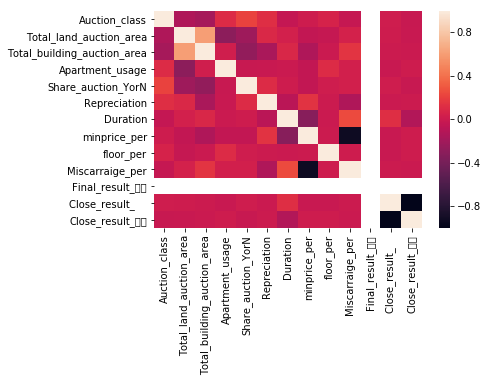

In [8]:
data=pd.get_dummies(data)
data.info()
X=data.drop(columns='y',axis=1,inplace=False).values
y=data.y.values
sb.heatmap(data.drop(columns='y',axis=1,inplace=False).corr())

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), X, y, cv = 5).mean()

C:\Users\j3eun\Anaconda3\envs\tobigs\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\j3eun\Anaconda3\envs\tobigs\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\j3eun\Anaconda3\envs\tobigs\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\j3eun\Anaconda3\envs\tobigs\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\j3eun\Anaconda3\envs\tobigs\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

0.7709108355091432

In [10]:
cross_val_score(GaussianNB(), X, y, cv = 5).mean()

0.7492175286643488

In [11]:

parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}
grid_search=GridSearchCV(KNeighborsClassifier(n_neighbors=5), parameters, cv=5)
grid_search.fit(X,y)
print(grid_search.best_params_)
cross_val_score(GridSearchCV(KNeighborsClassifier(n_neighbors=5), parameters, cv=5),X,y, cv=5).mean()



{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5}


0.7078999108568756

In [12]:
Cs = [0.001,0.01,0.1,1,10,]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X, y)
print(grid_search.best_params_)
cross_val_score(GridSearchCV(svm.SVC(kernel='rbf'),param_grid,cv=5),X,y,cv=5).mean()


{'C': 10, 'gamma': 0.001}


0.7063013372357382

In [ ]:
'''
knn이 가장 성능이 안 좋았다. 이는, 아마도 자료들이 다들 비슷하게 골고루 위치하고 잇어서 인 것 같다.
svm도 그리 좋은 편은 아니였다. nonlinear도 고려했지만 이런 것으로 보아, 자료개수에 비해 변수들이 많아서, linear svm가 더 잘 맞을
수 있는 것 같다.
Naive Bayes는 확률 계산을 하는 것인데, 우리가 이미 절반은 1 절반은 0으로 해두어서 아이가 헷갈리지 않고 일정 포인트를 기준으로
잘 분류해준 것 같다.
또한, 사실 knn이나 svm에서 모수들을 다양하게 시도해보면 정확도가 달라질 것이므로 그점을 염두해 둬야한다.
모수를 잘 맞추면 logistic regression보다 성능이 더 높아질 가능성 많음.
모수 range을 다양하게 하고나서 돌리면, 성능은 훨씬 좋아지겠지만, 시간이 진짜 많이 걸린다..
결론적으로,,, 나중에 모델이 진짜 필요하게 되면 시간을 들여서 할 수 밖에 없어보인다.
혹은, R로 돌릴시에는 훨씬 빨리돌아간다... 
'''